<a href="https://colab.research.google.com/github/FaisalWani123/Portfolio_Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This problem is used for optimizing a users portfolio using the Efficient Frontier and Python

In [21]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [23]:
assets = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
#ASSIGN WEIGHTS TO STOCK
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
#get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [16]:
#get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')


In [31]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#store the adjusted close price of the stock into the df
df = yf.download(assets, start=stockStartDate, end=today)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [ ]:
df

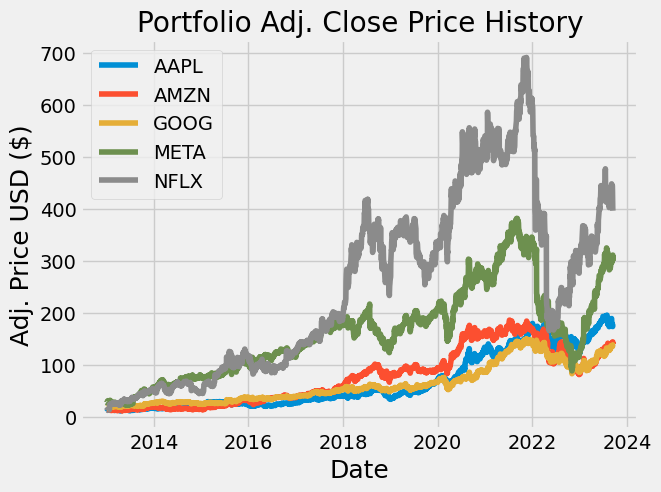

In [34]:
#visually show the stock / portfolio

title = 'Portfolio Adj. Close Price History'

#get the stocks
myStocks = df

#Create and plot the graph

for c in myStocks.columns.values:
  plt.plot(myStocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(myStocks.columns.values, loc='upper left')
plt.show()

In [35]:
returns = df.pct_change()
returns

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027854,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005883,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002692,-0.007748,-0.001974,-0.012237,-0.020565
...,...,...,...,...,...
2023-09-11,0.006623,0.035231,0.003936,0.032462,0.005781
2023-09-12,-0.017061,-0.013068,-0.012124,-0.019183,-0.023958
2023-09-13,-0.011855,0.025632,0.010509,0.011271,-0.051646


In [36]:
#Create and show the annualized covariance matrix
CovMatrixAnnual = returns.cov() *252
CovMatrixAnnual

,AAPL,AMZN,GOOG,META,NFLX
AAPL,0.082021,0.046673,0.044433,0.052987,0.043417
AMZN,0.046673,0.107064,0.056284,0.068754,0.073315
GOOG,0.044433,0.056284,0.075097,0.062973,0.055333
META,0.052987,0.068754,0.062973,0.148857,0.074085
NFLX,0.043417,0.073315,0.055333,0.074085,0.222287


In [37]:
#calculate the portfolio variance
PortVariance = np.dot(weights.T, np.dot(CovMatrixAnnual, weights))
PortVariance

0.07167322917694471

In [39]:
#calculate the portfolio volatility AKA standard deviation
PortVolatility = np.sqrt(PortVariance)
PortVolatility

0.26771856337756017

In [41]:
#calculate the annual portfolio return

PortfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) *252
PortfolioSimpleAnnualReturn

0.29829501556791743

In [44]:
#show the expected annual return, volatility (risk) and variance

PercentVar = str(round(PortVariance, 2) * 100) + '%'
PercentVols = str(round(PortVolatility, 2) * 100) + '%'
PercentReturn = str(round(PortfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected Annual Return: '+PercentReturn)
print('Annual volatility or Risk:' + PercentVols)
print('Annual Variance: ' + PercentVar)

Expected Annual Return: 30.0%
Annual volatility or Risk:27.0%
Annual Variance: 7.000000000000001%


In [45]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


In [47]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [52]:
#Portfolio Optimization

#Calculate the expected returns and the annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for Max Sharpe Ratio

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
CleanedWeights = ef.clean_weights()
print(CleanedWeights)
ef.portfolio_performance(verbose = True)



OrderedDict([('AAPL', 0.46943), ('AMZN', 0.14001), ('GOOG', 0.10502), ('META', 0.0116), ('NFLX', 0.27394)])
Expected annual return: 27.8%
Annual volatility: 26.7%
Sharpe Ratio: 0.97


(0.27794574485264956, 0.26696950064042896, 0.9661993007960368)

In [58]:
#Get the discrete allocation of each share or stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latestPrices = get_latest_prices(df)
weights = CleanedWeights
da = DiscreteAllocation(weights, latestPrices, total_portfolio_value= 150000)

allocation, leftover = da.lp_portfolio()

print('Discrete Allocation: ', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AAPL': 402, 'AMZN': 149, 'GOOG': 113, 'META': 6, 'NFLX': 104}
Funds Remaining: $16.35
